In [1]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)
install.packages("aod")
library("aod")
library("MASS")
library(vars)
library(aod)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nbconvertR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmp0AXQC1\downloaded_packages


Warning message:
"package 'nbconvertR' was built under R version 3.6.3"Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'aod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmp0AXQC1\downloaded_packages


Warning message:
"package 'aod' was built under R version 3.6.3"
Attaching package: 'aod'

The following object is masked from 'package:mgcv':

    negbin



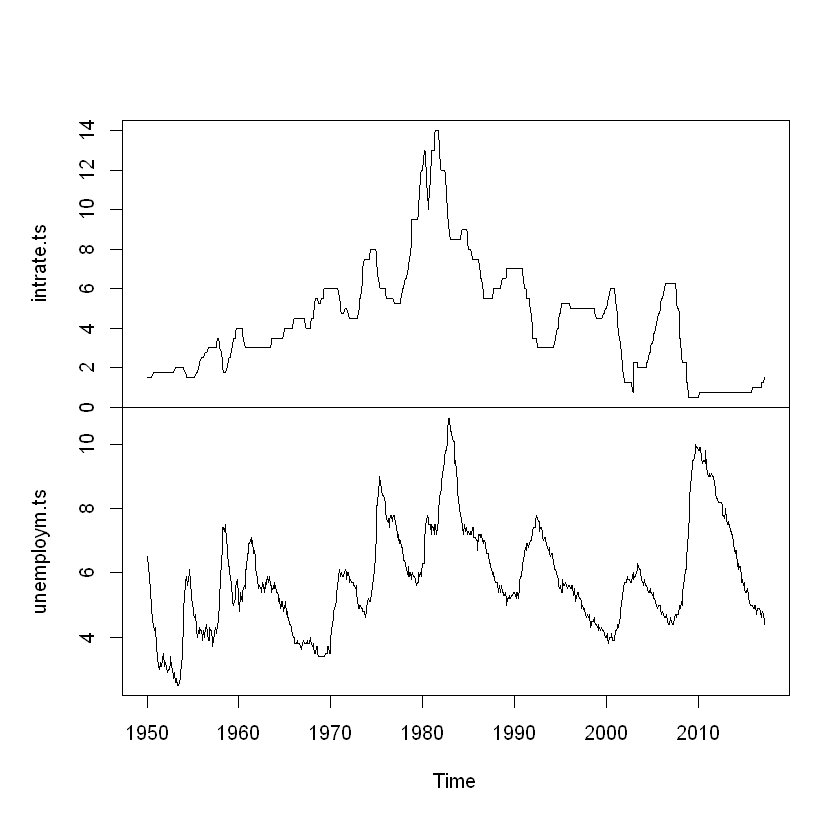

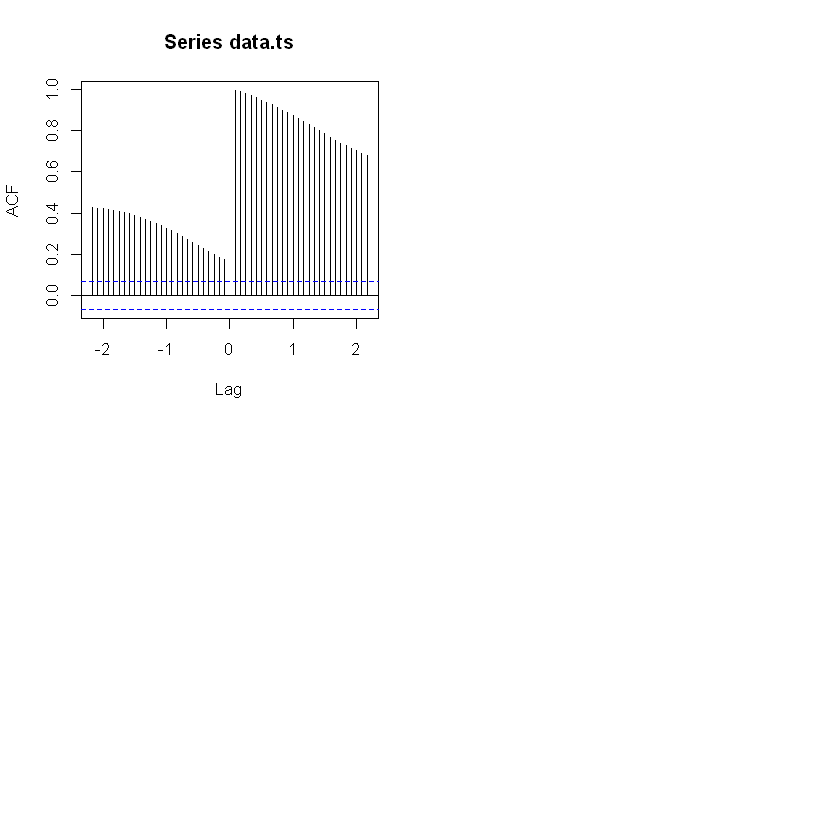

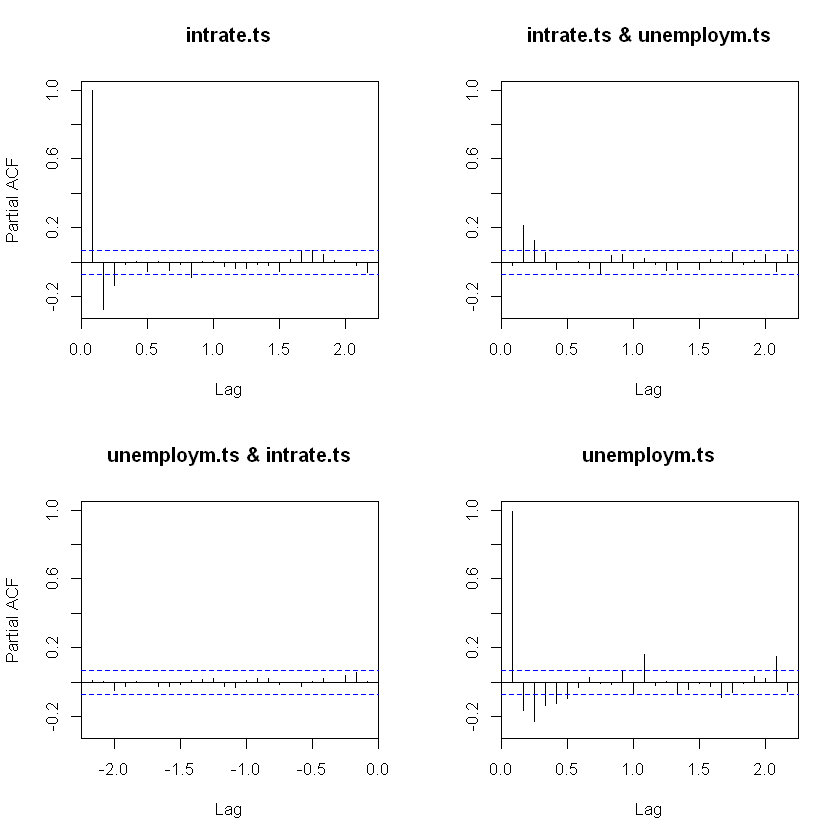

In [23]:
intrate = read.csv("InterestRate.csv",header=T) 
intrate.ts = ts(intrate$INT,start=1950, freq=12)
dates = as.Date(intrate[,1], format="%m/%d/%Y")

unemploym = read.csv("MonthlyUnemployment.csv",header=T)
unemploym = as.vector(t(unemploym[,-1]))
unemploym.ts = ts(unemploym[-c(809:816)],start=1950, freq=12)
data.ts = ts.union(intrate.ts,unemploym.ts)

par(mfrow=c(2,2))
plot(data.ts, type="l",main="")
acf(data.ts)
pacf(data.ts)

In [9]:
## Simultaneous lag correlation
n = length(intrate.ts)
cor(intrate.ts,unemploym.ts)
## lag-one correlation
cor(intrate.ts[1:(n-1)],unemploym.ts[2:n])
cor(intrate.ts[2:n],unemploym.ts[1:(n-1)])

cor(intrate.ts[4:n],unemploym.ts[3:(n-1)])

[1] 0.160546

[1] 0.1732577

[1] 0.1493509

[1] 0.1505586

[1] -0.1972198

[1] -0.242917

[1] -0.09715517

Warning message in par(mforw = c(2, 2)):
""mforw" is not a graphical parameter"

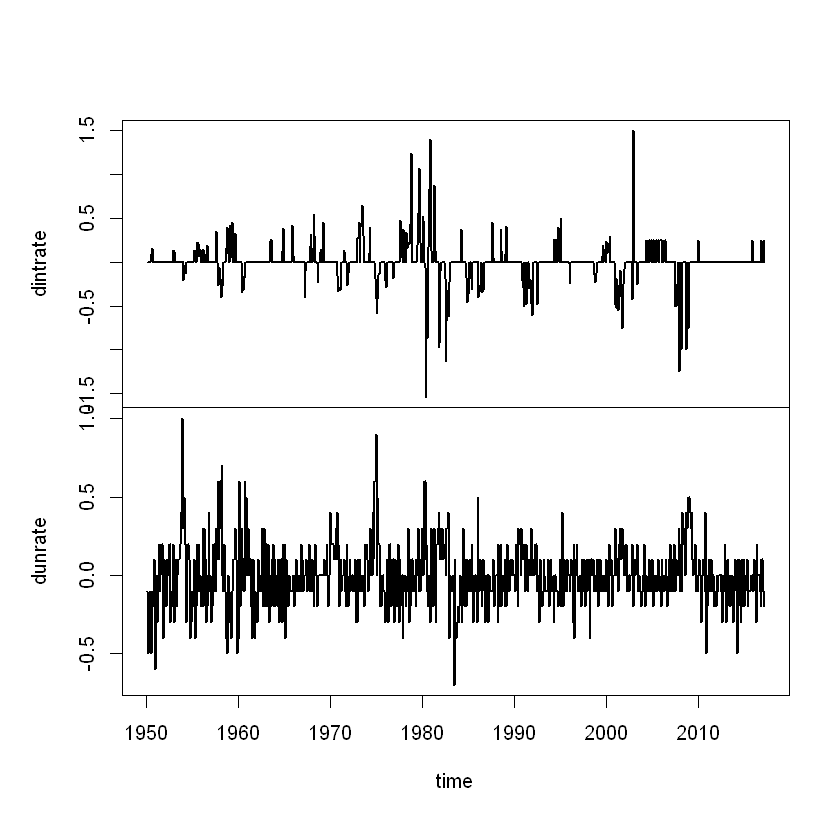

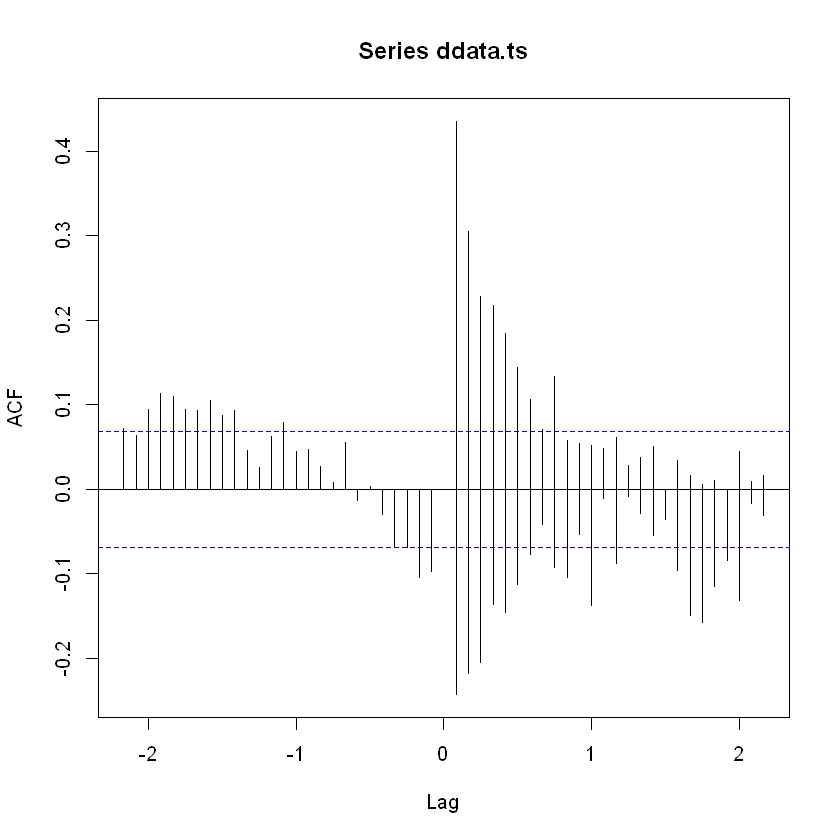

In [15]:
# take the first order difference
dunrate=diff(unemploym.ts)
dintrate=diff(intrate.ts)
ddata.ts = ts.union(dintrate,dunrate)
## lag-one correlation
cor(dunrate,dintrate)
cor(dunrate[1:(n-2)], dintrate[2:(n-1)])
cor(dunrate[2:(n-1)],dintrate[1:(n-2)])

plot(ddata.ts,xlab="time",main="",lwd=2,type="l")

par(mforw=c(2,2))
acf(ddata.ts)



In [24]:
## Fit Univariate AR Models to difference processes 
mod_un = ar(dunrate,order.max=20)
print(mod_un$order)
mod_int = ar(dintrate,order.max=20)
print(mod_int$order)

[1] 12
[1] 20


In [27]:
## Fit VAR model: capture relationship between change in interest rate vs change in unemplyment

mod_aic_1 = VAR(ddata.ts,lag.max=20,ic="AIC", type="none")
mod_aic_2 = VAR(ddata.ts,lag.max=20,ic="AIC", type="const")
mod_aic_3 = VAR(ddata.ts,lag.max=20,ic="AIC", type="trend")
mod_aic_4 = VAR(ddata.ts,lag.max=20,ic="AIC", type="both")

pord_1 = mod_aic_1$p
pord_2 = mod_aic_2$p 
pord_3 = mod_aic_3$p
pord_4 = mod_aic_4$p

mod_hq = VAR(ddata.ts,lag.max=20,ic="HQ")
mod_sc = VAR(ddata.ts,lag.max=20,ic="SC")
mod_fpe = VAR(ddata.ts,lag.max=20,ic="FPE")

pord_hq = mod_hq$p
pord_sc = mod_sc$p
pord_fpe = mod_fpe$p


pord_1
pord_2
pord_3
pord_4

pord_hq
pord_sc
pord_fpe

AIC(n) 
    12

AIC(n) 
    12

AIC(n) 
    12

AIC(n) 
    12

HQ(n) 
    2

SC(n) 
    2

FPE(n) 
    12


	ARCH (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 126.16, df = 45, p-value = 1.261e-09

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 126.16, df = 45, p-value = 1.261e-09



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8787, df = 4, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 33.126, df = 2, p-value = 6.408e-08


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8753.9, df = 2, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8787, df = 4, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 33.126, df = 2, p-value = 6.408e-08


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 8753.9, df = 2, p-value < 2.2e-16





	Portmanteau Test (asymptotic)

data:  Residuals of VAR object mod
Chi-squared = 16.709, df = 16, p-value = 0.4047

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object mod
Chi-squared = 16.709, df = 16, p-value = 0.4047



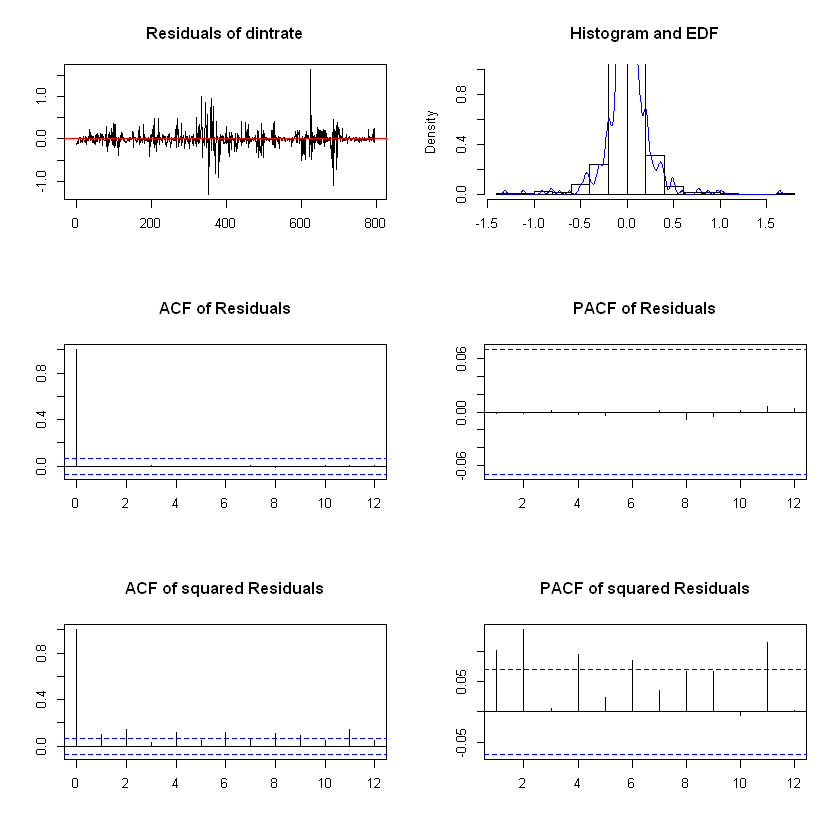

[1] 0

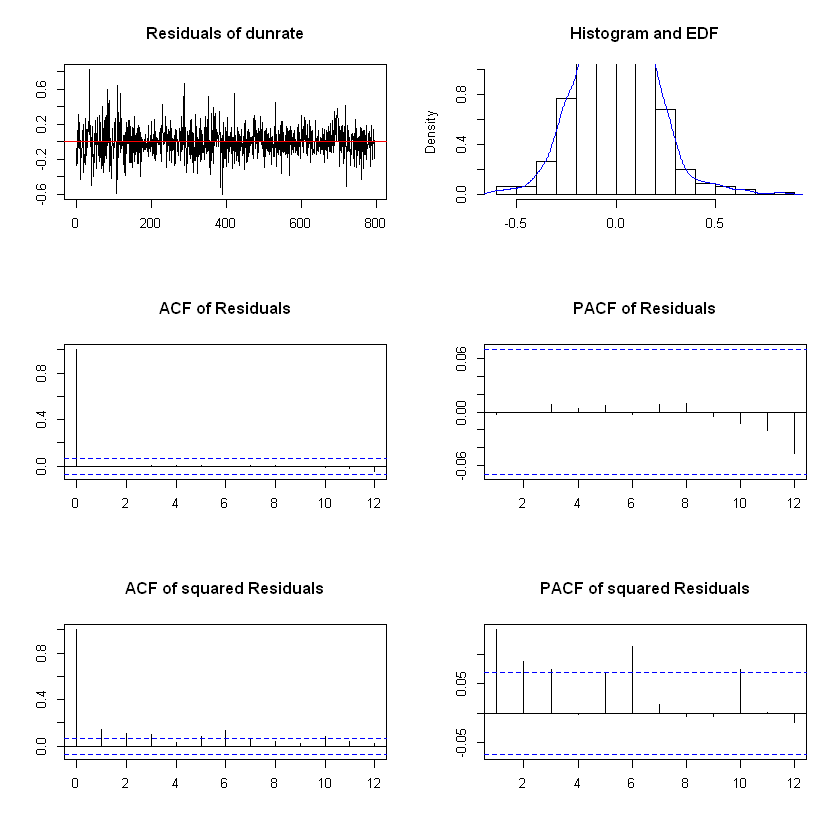

In [30]:
## Fit VAR Model with Selected Order
mod = VAR(ddata.ts,pord_4, type="both")

## Residual Analysis: Constant Variance Assumption
arch.test(mod)

## Residual Analysis: Normality Assumption
normality.test(mod)

## Residual Analysis: Uncorrelated Errors Assumption
serial.test(mod)
serialtest = serial.test(mod)
plot(serialtest)

## roots analysis: is this VAR process stable?
roots_mod = roots(mod)
sum(roots_mod>=1)

In [31]:
summary(mod)


VAR Estimation Results:
Endogenous variables: dintrate, dunrate 
Deterministic variables: both 
Sample size: 795 
Log Likelihood: 464.093 
Roots of the characteristic polynomial:
0.8992 0.8992 0.8935 0.8935 0.8828 0.8828 0.843 0.8405 0.8405 0.8335 0.8335 0.8223 0.8223 0.8129 0.8129 0.7931 0.7931 0.7819 0.7819 0.7389 0.7389 0.7381 0.7381 0.5686
Call:
VAR(y = ddata.ts, p = pord_4, type = "both")


Estimation results for equation dintrate: 
dintrate = dintrate.l1 + dunrate.l1 + dintrate.l2 + dunrate.l2 + dintrate.l3 + dunrate.l3 + dintrate.l4 + dunrate.l4 + dintrate.l5 + dunrate.l5 + dintrate.l6 + dunrate.l6 + dintrate.l7 + dunrate.l7 + dintrate.l8 + dunrate.l8 + dintrate.l9 + dunrate.l9 + dintrate.l10 + dunrate.l10 + dintrate.l11 + dunrate.l11 + dintrate.l12 + dunrate.l12 + const + trend 

               Estimate Std. Error t value Pr(>|t|)    
dintrate.l1   3.302e-01  3.631e-02   9.092  < 2e-16 ***
dunrate.l1   -1.693e-01  3.801e-02  -4.455 9.64e-06 ***
dintrate.l2   1.234e-01  3.831e-

In [49]:
vcov(mod)
2*pord_4

,dintrate:(Intercept),dintrate:dintrate.l1,dintrate:dunrate.l1,dintrate:dintrate.l2,dintrate:dunrate.l2,dintrate:dintrate.l3,dintrate:dunrate.l3,dintrate:dintrate.l4,dintrate:dunrate.l4,dintrate:dintrate.l5,...,dunrate:dunrate.l8,dunrate:dintrate.l9,dunrate:dunrate.l9,dunrate:dintrate.l10,dunrate:dunrate.l10,dunrate:dintrate.l11,dunrate:dunrate.l11,dunrate:dintrate.l12,dunrate:dunrate.l12,dunrate:trend
dintrate:(Intercept),1.947390e-04,-1.825102e-05,-7.136904e-06,-1.335052e-05,-1.147153e-05,-9.276828e-06,-1.177859e-05,-9.182073e-06,-1.191914e-05,-1.182827e-05,...,7.891996e-07,1.068022e-06,5.592727e-07,7.436402e-07,3.973911e-07,9.753056e-07,8.610017e-07,1.371691e-06,8.134843e-07,4.272042e-08
dintrate:dintrate.l1,-1.825102e-05,1.318716e-03,1.704845e-04,-4.391044e-04,2.078791e-04,-1.594672e-04,9.528483e-05,6.454993e-06,6.405968e-05,6.646357e-05,...,8.242694e-06,-5.285680e-06,9.359830e-06,1.794104e-05,-8.222411e-06,-6.944840e-06,-1.032378e-05,-5.893610e-08,2.293356e-06,-5.179616e-09
dintrate:dunrate.l1,-7.136904e-06,1.704845e-04,1.444782e-03,-7.896139e-05,-8.962898e-05,-2.285697e-05,-2.755602e-04,-1.867482e-05,-1.637055e-04,3.367745e-05,...,-3.291652e-06,1.117059e-05,1.110632e-06,-2.829049e-06,-2.470180e-06,-3.344383e-06,-1.845750e-05,6.007315e-06,8.895065e-06,-2.067796e-09
dintrate:dintrate.l2,-1.335052e-05,-4.391044e-04,-7.896139e-05,1.467569e-03,9.935668e-05,-3.860075e-04,1.820320e-04,-1.608925e-04,7.956928e-05,-1.452631e-05,...,-1.107900e-06,1.087894e-05,5.340197e-06,-1.133298e-05,1.222397e-05,2.020387e-05,-4.440384e-06,-7.322336e-06,-1.066933e-05,-3.879256e-09
dintrate:dunrate.l2,-1.147153e-05,2.078791e-04,-8.962898e-05,9.935668e-05,1.480740e-03,-9.522709e-05,-4.362881e-05,-2.130335e-05,-2.502039e-04,-1.759389e-05,...,9.848193e-06,-7.226524e-06,-1.253440e-06,1.382763e-05,3.063338e-07,-3.429476e-06,-9.196250e-07,-2.769505e-06,-1.856930e-05,-3.109769e-09
dintrate:dintrate.l3,-9.276828e-06,-1.594672e-04,-2.285697e-05,-3.860075e-04,-9.522709e-05,1.479186e-03,7.876536e-05,-3.825357e-04,1.702173e-04,-1.655907e-04,...,-3.454134e-06,-7.320863e-06,-3.118759e-06,9.400089e-06,5.487804e-06,-1.090518e-05,1.204135e-05,1.883010e-05,-5.546620e-06,-2.651406e-09
dintrate:dunrate.l3,-1.177859e-05,9.528483e-05,-2.755602e-04,1.820320e-04,-4.362881e-05,7.876536e-05,1.528292e-03,-9.324312e-05,-7.342566e-06,-1.213732e-05,...,1.348690e-05,3.215046e-06,8.474013e-06,-3.902307e-06,-3.987381e-06,1.438764e-05,-1.865731e-07,-3.188146e-06,-3.316184e-06,-3.045393e-09
dintrate:dintrate.l4,-9.182073e-06,6.454993e-06,-1.867482e-05,-1.608925e-04,-2.130335e-05,-3.825357e-04,-9.324312e-05,1.455490e-03,8.250273e-05,-3.753674e-04,...,4.542219e-06,8.448231e-06,-4.400732e-06,-7.033504e-06,-3.954807e-06,1.205080e-05,3.688870e-06,-3.041780e-06,1.175285e-05,-2.657264e-09
dintrate:dunrate.l4,-1.191914e-05,6.405968e-05,-1.637055e-04,7.956928e-05,-2.502039e-04,1.702173e-04,-7.342566e-06,8.250273e-05,1.553085e-03,-8.873940e-05,...,1.594997e-05,1.984525e-06,1.376616e-05,4.925891e-06,8.066351e-06,-4.153978e-06,-3.249283e-06,1.291082e-05,-9.516371e-07,-3.203668e-09
dintrate:dintrate.l5,-1.182827e-05,6.646357e-05,3.367745e-05,-1.452631e-05,-1.759389e-05,-1.655907e-04,-1.213732e-05,-3.753674e-04,-8.873940e-05,1.454944e-03,...,-7.535321e-06,-7.824822e-06,6.318357e-06,8.629405e-06,-3.589532e-06,-8.356807e-06,-2.822116e-06,9.429566e-06,4.947710e-06,-3.538409e-09


AIC(n) 
    24

In [48]:
## Does a smaller order fit the model equally well?  Apply Wald Test
## Coefficients for orders 3 to 12
coef.dintrate.3to12 = coefficients(mod)$dintrate[5:(2*pord_4),1]
coef.dunrate.3to12 = coefficients(mod)$dunrate[5:(2*pord_4),1]
## Covariance matrix of the coefficients
index.dintrate = 6:(2*pord_4 + 1)
var.dintrate.3to12 = vcov(mod)[index.dintrate,index.dintrate]
index.dunrate = c(((2*pord_4)+8):(4*pord_4+3))
var.dunrate.3to12 = vcov(mod)[index.dunrate,index.dunrate]
## Apply Wald Test

wald.test(b=coef.dintrate.3to12, var.dintrate.3to12, Terms=seq(1, 2*(pord_4-2)))
wald.test(b=coef.dunrate.3to12, var.dunrate.3to12, Terms=seq(1, 2*(pord_4-2)))

Wald test:
----------

Chi-squared test:
X2 = 31.7, df = 20, P(> X2) = 0.047

Wald test:
----------

Chi-squared test:
X2 = 65.4, df = 20, P(> X2) = 1e-06


	ARCH (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 126.16, df = 45, p-value = 1.261e-09

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object mod
Chi-squared = 126.16, df = 45, p-value = 1.261e-09



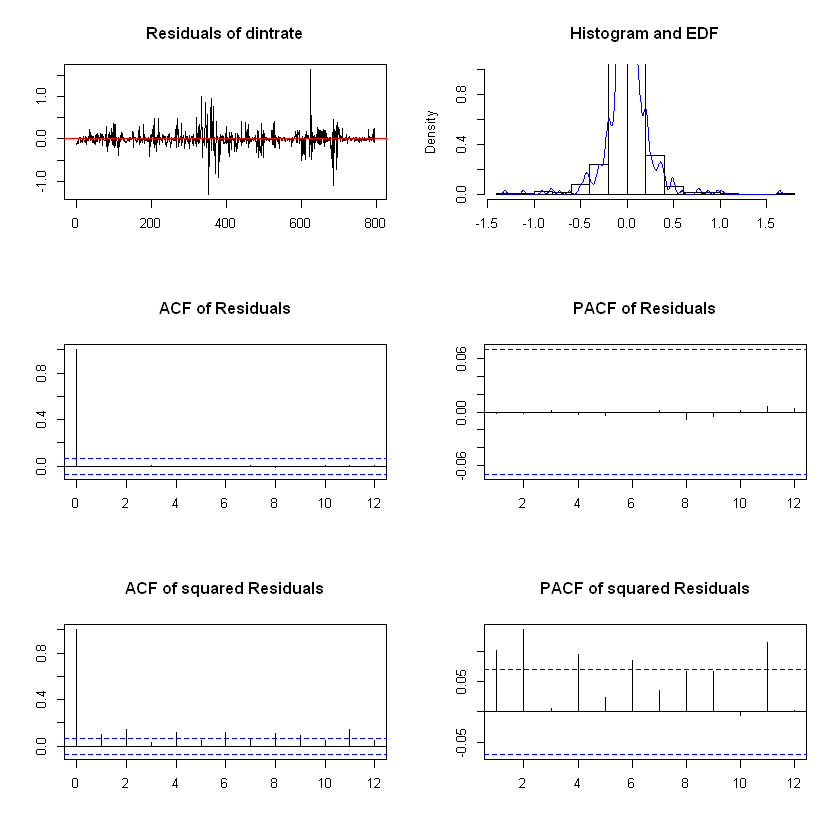

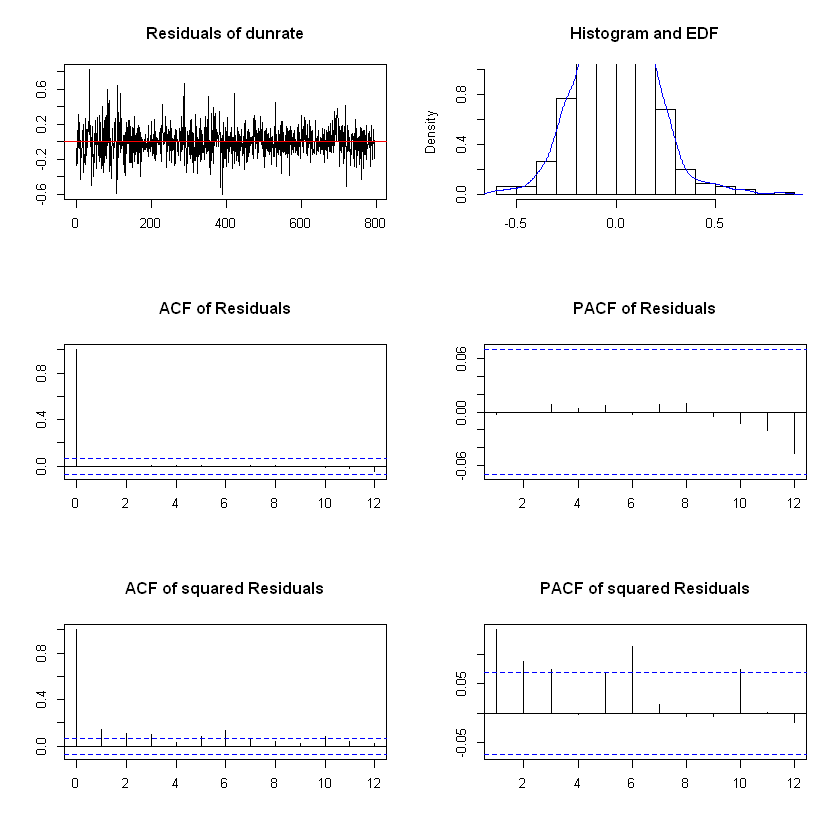

In [58]:
arch.test(mod)
#normality.test(mod)
#roots_mod=roots(mod)
#roots_mod
#summary(mod)
plot(serial.test(mod))

In [74]:
library(aod)
mod=VAR(ddata.ts,pord_1)
coef.dintrate=coefficients(mod$dintrate[-2*pord_1+1],1)
var.dintrate=vcov(mod)[1:(2*pord_1),1:(2*pord_1)]
wald.test(b=coef.dintrate,var.dintrate,Terms=seq(2,2*(pord_1-2)))

ERROR: Error in `[<-`(`*tmp*`, i, Terms[i], value = 1): subscript out of bounds


In [59]:
##############################################################################
## How well can we predict the change in the interest rate for beginning of 2017?

## Predict Interest Rate Change using Univariate AR
nfit = 12*67
n = length(dintrate)
dintrate.train = dintrate[1:nfit]
dintrate.test = dintrate[(nfit+1):n]
ar.train = ar(dintrate.train, order.max=12)
print(ar.train$order)
dintrate.predict = predict(ar.train,n.ahead=(n-nfit))
dintrate.fcst.1 = dintrate.predict$pred
dintrate.se.1 = dintrate.predict$se
dintrate.lo.1 = dintrate.fcst.1-1.96*dintrate.se.1
dintrate.up.1 = dintrate.fcst.1+1.96*dintrate.se.1

[1] 10


In [76]:
## Predict Interest Rate Change using VAR
ddata.train = ddata.ts[1:nfit,]
mod.train = VAR(ddata.train,pord_4)
ddata.predict = predict(mod.train,n.ahead=(n-nfit))
dintrate.fcst.2 = ddata.predict[[1]]$dintrate[,1]
dintrate.lo.2 = ddata.predict[[1]]$dintrate[,2]
dintrate.up.2 = ddata.predict[[1]]$dintrate[,3]

ymin = min(c(dintrate.fcst.1,dintrate.fcst.2,ddata.ts[,1]))
ymax = max(c(dintrate.fcst.1,dintrate.fcst.2,ddata.ts[,1]))

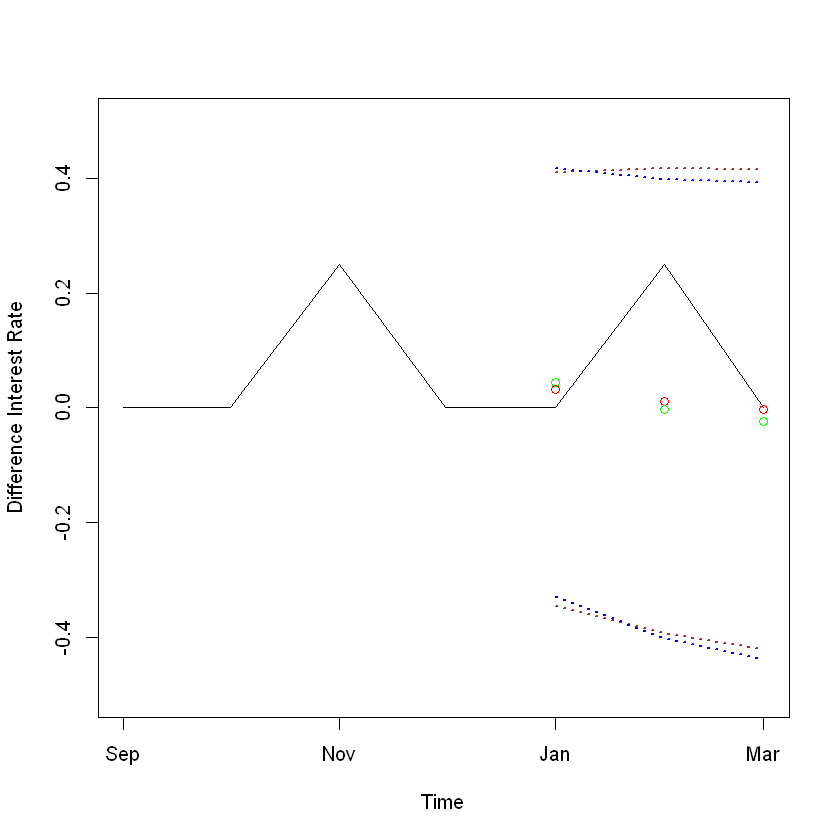

In [79]:
plot(dates[(n-6):n], ddata.ts[(n-6):n,1],type="l", ylim=c(-0.5,0.5), xlab="Time", ylab="Difference Interest Rate")
points(dates[(nfit+1):n],dintrate.fcst.1,col="red")
points(dates[(nfit+1):n],dintrate.fcst.2,col="green")
lines(dates[(nfit+1):n],dintrate.lo.1,lty=3,lwd= 2, col="brown")
lines(dates[(nfit+1):n],dintrate.up.1,lty=3,lwd= 2, col="brown")
lines(dates[(nfit+1):n],dintrate.lo.2,lty=3,lwd= 2, col="blue")
lines(dates[(nfit+1):n],dintrate.up.2,lty=3,lwd= 2, col="blue")

In [34]:
#### Granger Causality: Wald Test
library(aod)
mod = VAR(ddata.ts,pord_1)
coef.dintrate = coefficients(mod)$dintrate[-(2*pord_1+1),1]
var.dintrate = vcov(mod)[2:(2*pord_1+1),2:(2*pord_1+1)]
wald.test(b=coef.dintrate, var.dintrate, Terms=seq(2, 2*pord_1, 2))

Wald test:
----------

Chi-squared test:
X2 = 45.1, df = 12, P(> X2) = 1e-05